In [1]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_raw = pd.read_csv(url,index_col='Date')

In [4]:
df_raw.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
1/1/17,Sunday,27.0,2.00,15,0.5,10
1/2/17,Monday,28.9,1.33,15,0.5,13
1/3/17,Tuesday,34.5,1.33,27,0.5,15
1/4/17,Wednesday,44.1,1.05,28,0.5,17
1/5/17,Thursday,42.4,1.00,33,0.5,18


In [5]:
# lower case and underscores for everyone:
df_raw.columns = [col.lower().replace('.','_') for col in df_raw.columns]

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1/1/17 to 12/31/17
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          365 non-null    object 
 1   temperature  365 non-null    float64
 2   rainfall     365 non-null    float64
 3   flyers       365 non-null    int64  
 4   price        365 non-null    float64
 5   sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 20.0+ KB


In [8]:
df = df_raw.drop(columns=['day'])

In [9]:
df.head()

,temperature,rainfall,flyers,price,sales
Date,,,,,
1/1/17,27.0,2.00,15,0.5,10
1/2/17,28.9,1.33,15,0.5,13
1/3/17,34.5,1.33,27,0.5,15
1/4/17,44.1,1.05,28,0.5,17
1/5/17,42.4,1.00,33,0.5,18


In [10]:
def get_fences(df, col, k=1.5):
    '''
    get_fences takes in a dataframe and a string literal
    df, a pandas dataframe
    k, an integer representing the fence for our method
    col, a string literal represening a column name
    returns the lower and upper fences of a series
    '''
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower_fence = q1 - iqr*k
    upper_fence = q3 + iqr*k
    return lower_fence, upper_fence

In [13]:
my_fences = {}
for col in df.columns:
    my_fences[col] = get_fences(df,col,k=1.5)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [14]:
for col in df:
    print(f'For feature {col}')
    print(df[
    (df[col] < my_fences[col][0]) \
    | (df[col] > my_fences[col][1])])
    print('========================')

For feature temperature
          temperature  rainfall  flyers  price  sales
Date                                                 
2/11/17         212.0      0.91      35    0.5     21
12/31/17         15.1      2.50       9    0.5      7
For feature rainfall
          temperature  rainfall  flyers  price  sales
Date                                                 
1/1/17           27.0      2.00      15    0.5     10
1/2/17           28.9      1.33      15    0.5     13
1/3/17           34.5      1.33      27    0.5     15
1/6/17           25.3      1.54      23    0.5     11
1/7/17           32.9      1.54      19    0.5     13
1/11/17          32.6      1.54      23    0.5     12
1/12/17          38.2      1.33      16    0.5     14
1/13/17          37.5      1.33      19    0.5     15
1/16/17          30.6      1.67      24    0.5     12
1/17/17          32.2      1.43      26    0.5     14
1/20/17          31.6      1.43      20    0.5     12
1/24/17          28.6      1.54      

### 1a. lower outlier for 'flyers' of -38...suspect input error...investigate

### 1b. upper outlier for 'temperature' of 212.0...suspect input error...investigate
###  maybe sales upper outliers of 235 and 534 should be investigated

In [17]:
my_fences = {}
for col in df.columns:
    my_fences[col] = get_fences(df,col,k=3)

In [18]:
for col in df:
    print(f'For feature {col}')
    print(df[
    (df[col] < my_fences[col][0]) \
    | (df[col] > my_fences[col][1])])
    print('========================')

For feature temperature
         temperature  rainfall  flyers  price  sales
Date                                                
2/11/17        212.0      0.91      35    0.5     21
For feature rainfall
          temperature  rainfall  flyers  price  sales
Date                                                 
1/1/17           27.0      2.00      15    0.5     10
12/5/17          22.0      1.82      11    0.5     10
12/10/17         31.3      1.82      15    0.5     11
12/31/17         15.1      2.50       9    0.5      7
For feature flyers
          temperature  rainfall  flyers  price  sales
Date                                                 
11/21/17         47.0      0.95     -38    0.5     20
For feature price
Empty DataFrame
Columns: [temperature, rainfall, flyers, price, sales]
Index: []
For feature sales
        temperature  rainfall  flyers  price  sales
Date                                               
7/1/17        102.9      0.47      59    0.5    143
7/2/17         93.

### 1c. again...lower outlier for 'flyers' of -38...suspect input error...investigate

### 1d. again...upper outlier for 'temperature' of 212.0...suspect input error...investigate
###  maybe sales upper outliers of 235 and 534 should be investigated

In [34]:
# plotting defaults
plt.rc('figure', figsize=(4, 2))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=8)

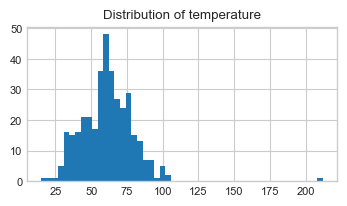

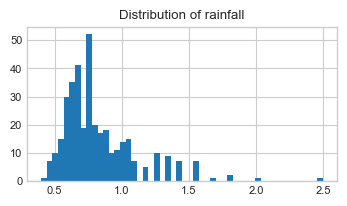

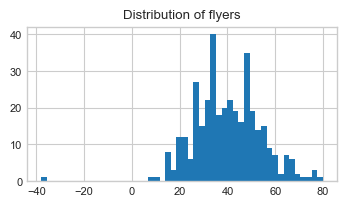

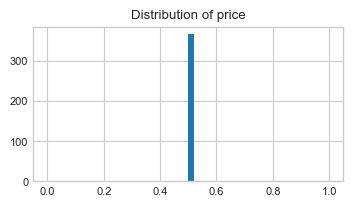

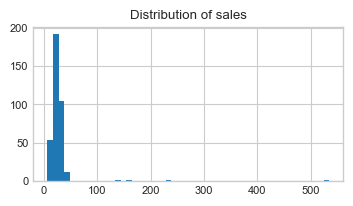

In [36]:
# brief visual analysis:
for col in df:
    df[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

In [38]:
# getting z for multiple columns
for col in df.columns:
    print(f' For Column {col}')
    print(df[(((
    df[col] - df[col].mean()
)/ df[col].std()) > 2) | (((
    df[col] - df[col].mean()
)/ df[col].std()) < -2)].T)
    print('=============')

 For Column temperature
Date         2/11/17  6/16/17  6/26/17  7/1/17  7/10/17  7/18/17  7/22/17  \
temperature   212.00    99.30   102.60  102.90    98.00    99.30    99.60   
rainfall        0.91     0.47     0.47    0.47     0.49     0.47     0.47   
flyers         35.00    77.00    60.00   59.00    66.00    76.00    49.00   
price           0.50     0.50     0.50    0.50     0.50     0.50     0.50   
sales          21.00    41.00    42.00  143.00    40.00    41.00    42.00   

Date         7/27/17  12/5/17  12/31/17  
temperature    97.90    22.00      15.1  
rainfall        0.47     1.82       2.5  
flyers         74.00    11.00       9.0  
price           0.50     0.50       0.5  
sales          43.00    10.00       7.0  
 For Column rainfall
Date         1/1/17  1/6/17  1/7/17  1/11/17  1/16/17  1/17/17  1/20/17  \
temperature    27.0   25.30   32.90    32.60    30.60    32.20    31.60   
rainfall        2.0    1.54    1.54     1.54     1.67     1.43     1.43   
flyers         

### 2. same conclusion as earlier..investigate the "TEMPAERATURE" input error of 212.0 the others are plausible values
###  again, investigate "FLYERS" of -38 input error
### again, investigate reasons behind "SALES" values over 200...

In [39]:
# 3 Standard deviations away...
# getting z for multiple columns
for col in df.columns:
    print(f' For Column {col}')
    print(df[(((
    df[col] - df[col].mean()
)/ df[col].std()) > 3) | (((
    df[col] - df[col].mean()
)/ df[col].std()) < -3)].T)
    print('=============')

 For Column temperature
Date         2/11/17
temperature   212.00
rainfall        0.91
flyers         35.00
price           0.50
sales          21.00
 For Column rainfall
Date         1/1/17  1/16/17  12/5/17  12/10/17  12/31/17
temperature    27.0    30.60    22.00     31.30      15.1
rainfall        2.0     1.67     1.82      1.82       2.5
flyers         15.0    24.00    11.00     15.00       9.0
price           0.5     0.50     0.50      0.50       0.5
sales          10.0    12.00    10.00     11.00       7.0
 For Column flyers
Date         11/21/17
temperature     47.00
rainfall         0.95
flyers         -38.00
price            0.50
sales           20.00
 For Column price
Empty DataFrame
Columns: []
Index: [temperature, rainfall, flyers, price, sales]
 For Column sales
Date         7/1/17  7/2/17  7/3/17  7/4/17
temperature  102.90   93.40   81.50   84.20
rainfall       0.47    0.51    0.54    0.59
flyers        59.00   68.00   68.00   49.00
price          0.50    0.50    0.50  

### 3. same conclusion as earlier..investigate the "TEMPAERATURE" input error of 212.0 the others are plausible values
###  again, investigate "FLYERS" of -38 input error
### again, investigate reasons behind "SALES" values over 200...

## without getting the context of the values, it is not good to summarily dismiss or permit outliers...need the context and the reasoning to sniff out input errors, measurement error, and other human-cenntric errors.